In [4]:
from typing import Union
import numpy as np
import pandas as pd
import numpy.typing as npt
from typing import Tuple
from tqdm import tqdm
from matplotlib import pyplot as plt
from simulations.stochastic_models import StochasticModels

from utility.math_equations import (
    compute_currrent_step_log_price,
    compute_next_step_log_vol,
)

from filters.kalman_filter import LinearKalmanFilterND
from filters.unscented_kalman_filter import UnscentedKalmanFilter

In [15]:
# Seed for reproducibility
# np.random.seed(42)

t, prices, vol_sto = StochasticModels.simulate_heston_process_with_jump(5,100)

df = pd.DataFrame({"t": t, "prices": prices, "vol_sto": vol_sto})
df["returns"] = df.prices.pct_change().fillna(0)
df["vol"] = df.returns.rolling(30).std().apply(lambda x: x * np.sqrt(252))
df = df.dropna().reset_index(drop=True)
df

,t,prices,vol_sto,returns,vol
0,0.115079,139.691037,0.247330,0.007783,0.505043
1,0.119048,144.483807,0.263391,0.034310,0.507924
2,0.123016,147.802968,0.250459,0.022973,0.490804
3,0.126984,149.583273,0.235436,0.012045,0.475809
4,0.130952,161.971673,0.153205,0.082819,0.513687
...,...,...,...,...,...
1227,4.984127,239.029915,0.205828,-0.029829,0.623762
1228,4.988095,226.567733,0.228824,-0.052136,0.641916
1229,4.992063,218.306676,0.226422,-0.036462,0.646744
1230,4.996032,222.258282,0.233006,0.018101,0.648204


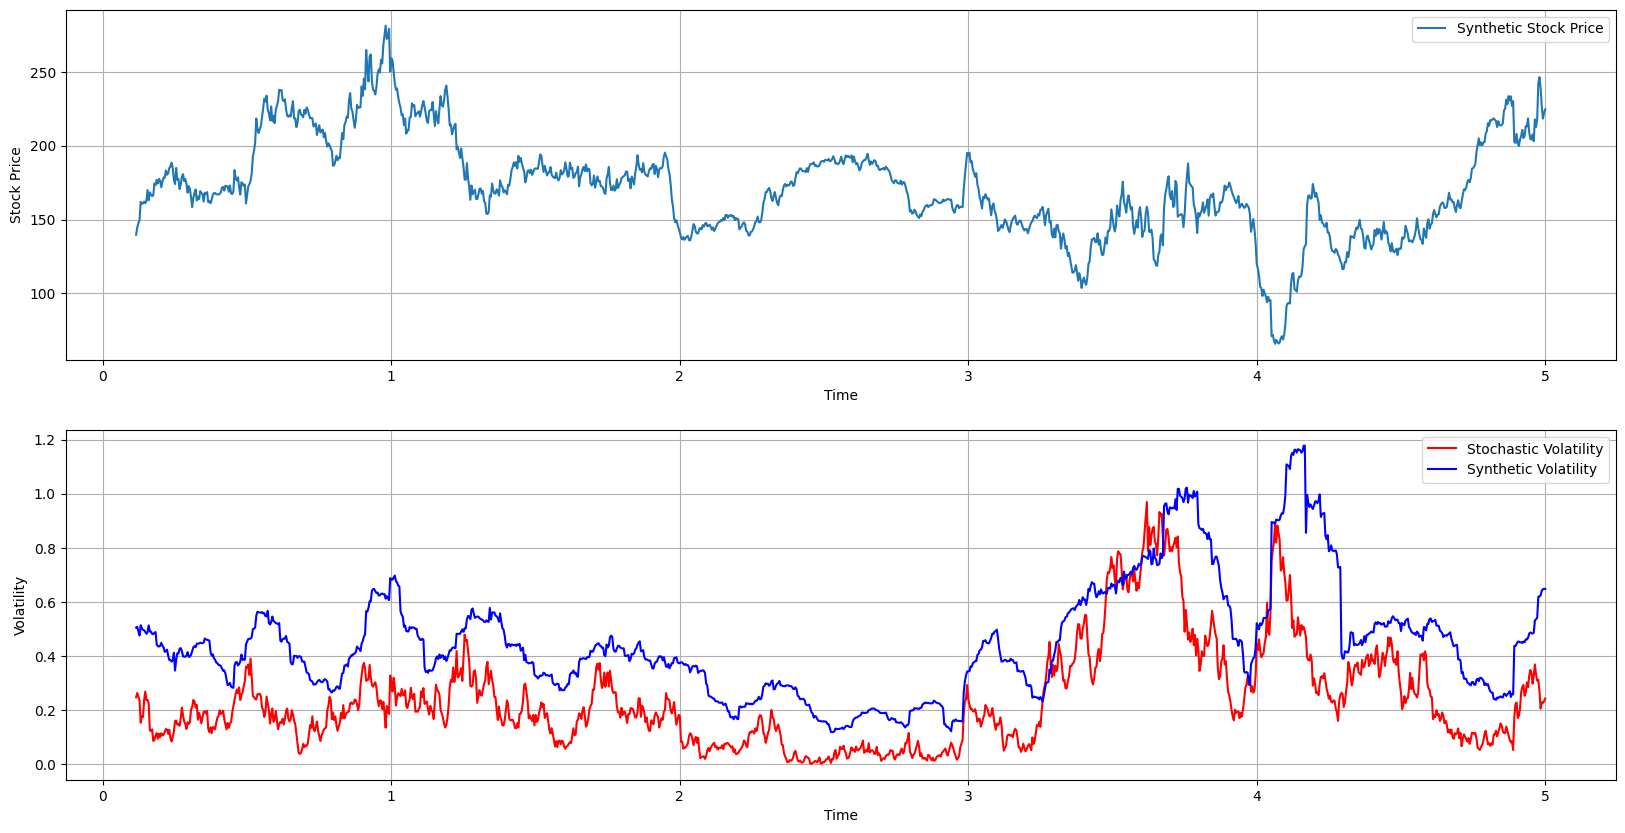

In [16]:
fig, ax = plt.subplots(2, 1, figsize=(20, 10))
ax[0].plot(df.t, df.prices, label="Synthetic Stock Price")
ax[0].set_xlabel("Time")
ax[0].set_ylabel("Stock Price")
ax[0].legend()
ax[0].grid()

ax[1].plot(df.t, df.vol_sto, color="red", label="Stochastic Volatility")
ax[1].plot(df.t, df.vol, color="blue", label="Synthetic Volatility")
ax[1].set_xlabel("Time")
ax[1].set_ylabel("Volatility")
ax[1].legend()
ax[1].grid()


# Let's UKF


## SImple example

UKF:   0%|          | 0/1231 [00:00<?, ?it/s]

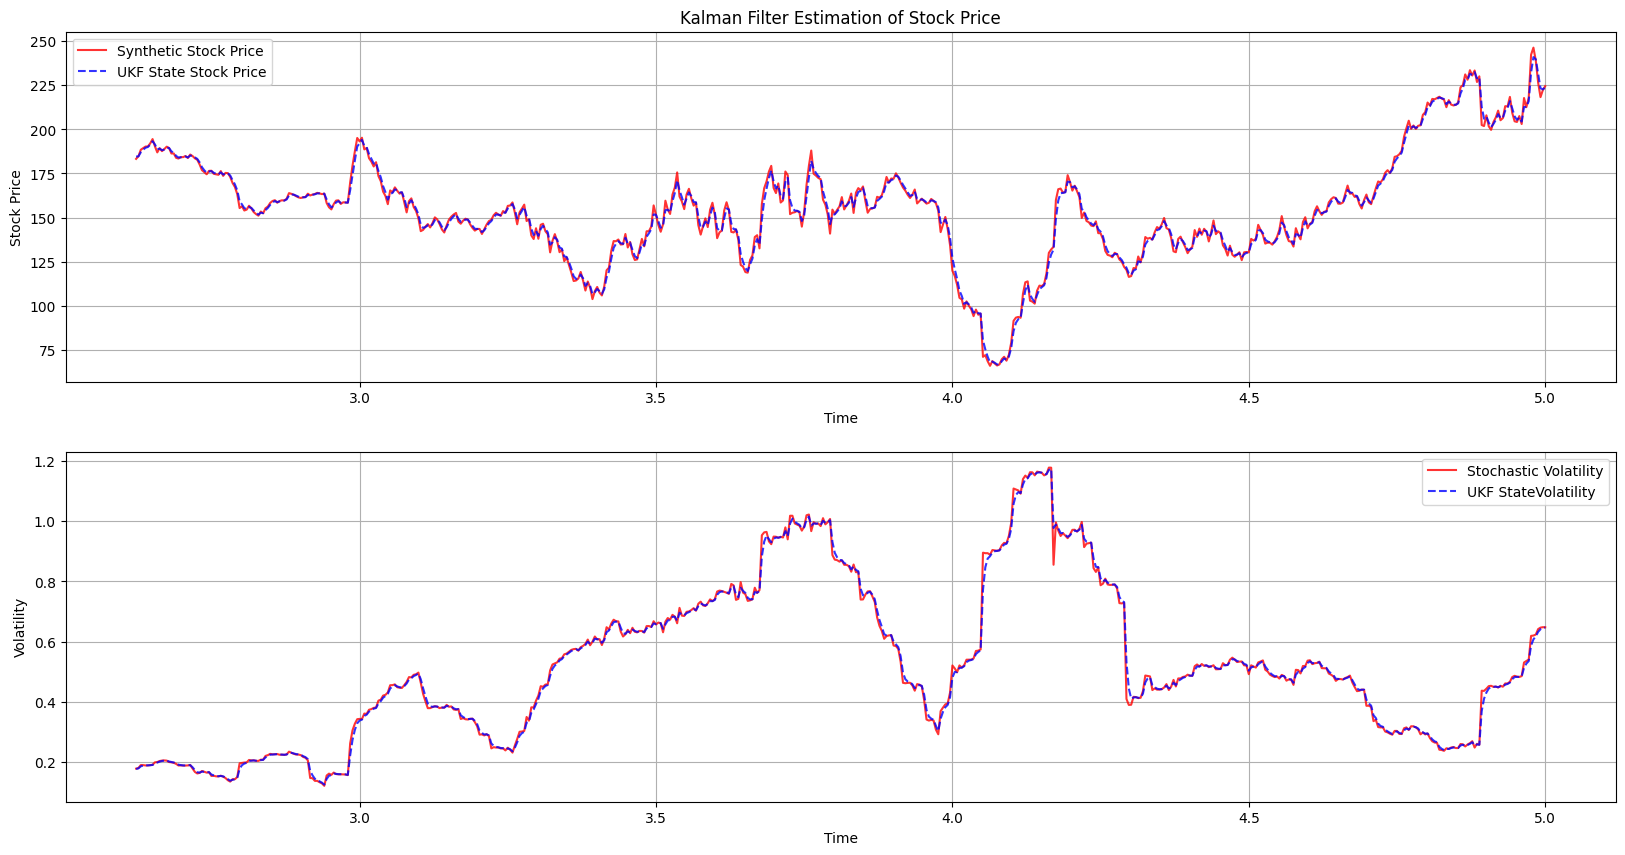

In [25]:
Z = df[["prices", "vol"]].to_numpy()

ukf = UnscentedKalmanFilter(
    dim_x=Z.shape[-1],
    dim_z=Z.shape[-1],
    Q=np.array([[5, 0.0], [0.0, 10]]),
    R=np.array([[5, 0.0], [0.0, 10]]),
)


def f(x, u, v):
    return x + u + v


def h(x, u, n):
    return x + u + n


X_hat, _ = ukf.fit_predict(f, h, z=Z)

N = 600
fig, ax = plt.subplots(2, 1, figsize=(20, 10))
ax[0].set_title("Kalman Filter Estimation of Stock Price")

ax[0].plot(df.t[-N:], df.prices[-N:],  color="red", label="Synthetic Stock Price", alpha=0.8)
ax[0].plot(df.t[-N:], X_hat[-N:, 0], color="blue", label="UKF State Stock Price", alpha=0.8, linestyle="--")
ax[0].set_xlabel("Time")
ax[0].set_ylabel("Stock Price")
ax[0].legend()
ax[0].grid()

ax[1].plot(df.t[-N:], df.vol[-N:], color="red", label="Stochastic Volatility", alpha=0.8)
ax[1].plot(df.t[-N:], X_hat[-N:, -1], color="blue", label="UKF StateVolatility", alpha=0.8, linestyle="--")
ax[1].set_xlabel("Time")
ax[1].set_ylabel("Volatility")
ax[1].legend()
ax[1].grid()

# # Plot the results
# plt.figure(figsize=(20, 8))
# plt.plot(df.t[-300:], df.vol[-300:], label="Synthetic Stock Price", alpha=0.5)
# plt.plot(
#     df.t[-300:], X_hat[-300:, -1], label="UKF State", linestyle="--", color="green"
# )
# # plt.plot(df.t[50:], y_hat[50:,-1], label="Kalman Filter Estimate", linestyle="--", color="red")
# plt.title("Kalman Filter Estimation of Stock Price")
# plt.xlabel("Days")
# plt.ylabel("Stock Price")
# plt.legend()
# plt.grid(True)
# plt.show()

## Our SSM

In [ ]:
from filters.ssm import DSSM

In [ ]:
DSSM.f()

In [ ]:
LEARNABLE_PARAMS = [0.2, 0.02, 0.03, -0.3, 0.07, 0.5] 

In [ ]:
compute_currrent_step_log_price()


In [ ]:
compute_next_step_log_vol,

In [ ]:
Z = df[["prices", "vol"]].to_numpy()

ukf = UnscentedKalmanFilter(
    dim_x=Z.shape[-1],
    dim_z=Z.shape[-1],
    Q=np.array([[5, 0.0], [0.0, 10]]),
    R=np.array([[5, 0.0], [0.0, 10]]),
)


def f(x, u, v):
    return x + u + v


def h(x, u, n):
    return x + u + n


X_hat, _ = ukf.fit_predict(f, h, z=Z)
